Bài 1

In [1]:
import numpy as np

A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])

print(len(A), len(search_vector))

rows = len(A) - len(search_vector) + 1
cols = len(search_vector)
B = np.zeros((rows, cols), dtype=int)

for i in range(rows):
    for j in range(cols):
        B[i, j] = A[i + j]

print(B)

C = np.inner(B, search_vector)
print(C)

target_value = np.inner(search_vector, search_vector)
print(target_value)

for i in range(rows):
    if C[i] == target_value:
        print(i, B[i])


10 3
[[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]
[ 1 -3 -1  4 -1 -1  2  0]
2
6 [ 0  1 -1]


Saving images (2).jpg to images (2) (1).jpg


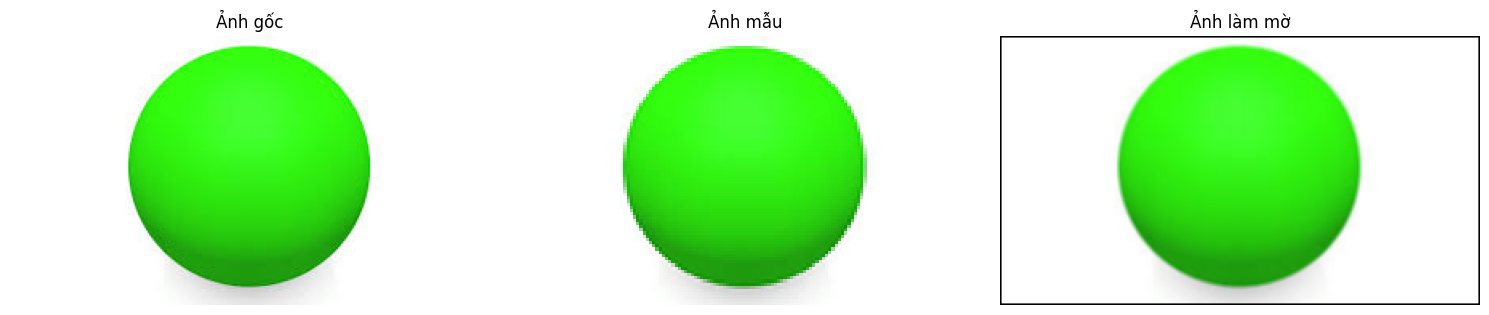

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
!pip install Pillow

from google.colab import files
uploaded = files.upload()

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

filename = next(iter(uploaded))
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
original_image = input_image.copy()

new_width = int(input_image.width / 2)
new_height = int(input_image.height / 2)
resized_image = input_image.resize((new_width, new_height), Image.Resampling.LANCZOS)
resized_filename = "resized_" + filename
resized_image.save(resized_filename)

input_pixels = input_image.load()
box_kernel = [[1/9]*3 for _ in range(3)]
offset = 1

blurred_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(blurred_image)

for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(3):
            for b in range(3):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                for i in range(3):
                    acc[i] += pixel[i] * box_kernel[a][b]
        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

blurred_filename = "blurred_" + filename
blurred_image.save(blurred_filename)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(original_image)
axs[0].set_title("Ảnh gốc")
axs[0].axis('off')
axs[1].imshow(resized_image)
axs[1].set_title("Ảnh mẫu")
axs[1].axis('off')
axs[2].imshow(blurred_image)
axs[2].set_title("Ảnh làm mờ")
axs[2].axis('off')
plt.tight_layout()
plt.show()

files.download(resized_filename)
files.download(blurred_filename)


bài 2

                A         B         C         D
Lần lặp                                        
0        1.000000  1.000000  1.000000  1.000000
1        1.000000  0.333333  0.833333  1.833333
2        1.333333  0.333333  1.250000  1.083333
3        1.166667  0.444444  0.986111  1.402778
4        1.194444  0.388889  1.090278  1.326389
5        1.208333  0.398148  1.061343  1.332176
6        1.196759  0.402778  1.068866  1.331597
7        1.200231  0.398920  1.064718  1.336130
8        1.200424  0.400077  1.068142  1.331356
9        1.199749  0.400141  1.065820  1.334290
10       1.200055  0.399916  1.067061  1.332968


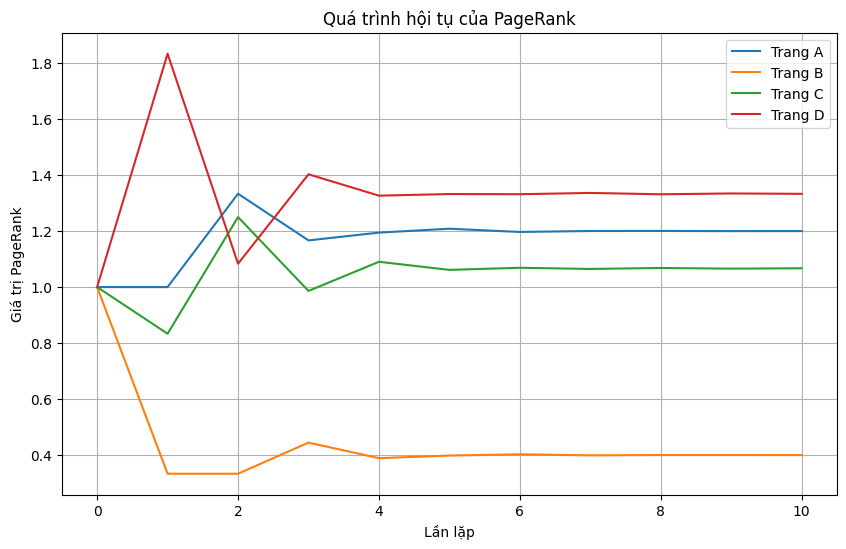

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A = np.array([
    [0,   0,   1/2, 1/2],
    [1/3, 0,     0,   0],
    [1/3, 0,     0, 1/2],
    [1/3, 1,   1/2,   0]
])

x = np.array([1.0, 1.0, 1.0, 1.0])
iterations = [x.copy()]

for i in range(10):
    x = np.dot(A, x)
    iterations.append(x.copy())

df = pd.DataFrame(np.round(iterations, 6), columns=['A', 'B', 'C', 'D'])
df.index.name = 'Lần lặp'
print(df)

plt.figure(figsize=(10, 6))
for i, page in enumerate(['A', 'B', 'C', 'D']):
    plt.plot(df.index, df[page], label=f'Trang {page}')
plt.title('Quá trình hội tụ của PageRank')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị PageRank')
plt.legend()
plt.grid(True)
plt.show()


                A         B         C         D
Lần lặp                                        
0        1.000000  1.000000  1.000000  1.000000
1        0.750000  0.583333  0.583333  2.083333
2        0.812500  0.770833  0.770833  1.645833
3        0.796875  0.682292  0.682292  1.838542
4        0.800781  0.725260  0.725260  1.748698
5        0.799805  0.704102  0.704102  1.791992
6        0.800049  0.714600  0.714600  1.770752
7        0.799988  0.709371  0.709371  1.781270


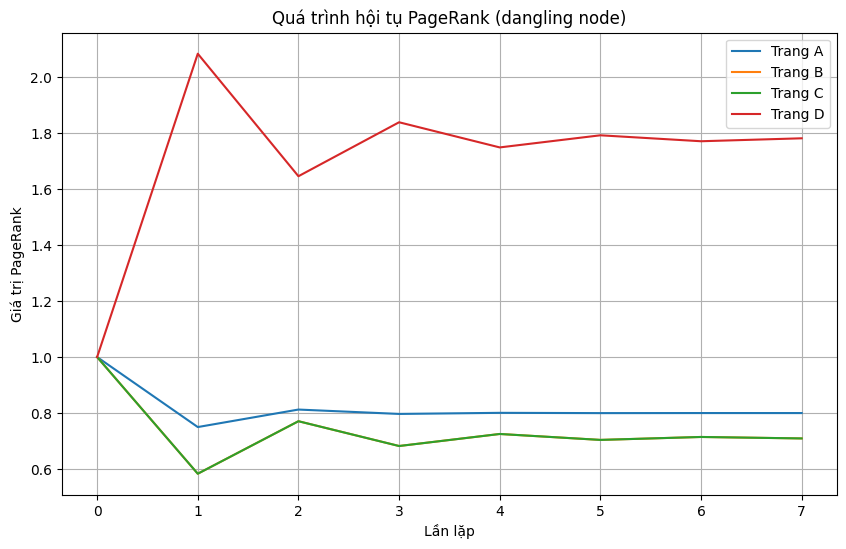

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A = np.array([
    [0,   0,   1/2, 1/4],
    [1/3, 0,     0, 1/4],
    [1/3, 0,     0, 1/4],
    [1/3, 1,   1/2, 1/4]
])

x = np.array([1.0, 1.0, 1.0, 1.0])
iterations = [x.copy()]

for i in range(7):
    x = np.dot(A, x)
    iterations.append(x.copy())

df = pd.DataFrame(np.round(iterations, 6), columns=['A', 'B', 'C', 'D'])
df.index.name = 'Lần lặp'
print(df)

plt.figure(figsize=(10, 6))
for page in ['A', 'B', 'C', 'D']:
    plt.plot(df.index, df[page], label=f'Trang {page}')
plt.title('Quá trình hội tụ PageRank (dangling node)')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị PageRank')
plt.legend()
plt.grid(True)
plt.show()


                A         B         C         D         E         F         G  \
Lần lặp                                                                         
0        0.125000  0.125000  0.125000  0.125000  0.125000  0.125000  0.125000   
1        0.071875  0.107292  0.054167  0.160417  0.125000  0.178125  0.231250   
2        0.041771  0.062135  0.039115  0.107734  0.140052  0.245859  0.223724   
3        0.034527  0.046362  0.029738  0.072770  0.148801  0.248211  0.222877   
4        0.029995  0.039778  0.027139  0.059482  0.142550  0.258819  0.226782   
5        0.028548  0.037046  0.025512  0.053952  0.143918  0.261988  0.215671   
6        0.027599  0.035687  0.024844  0.051432  0.143845  0.254056  0.215995   
7        0.027088  0.034908  0.024349  0.050075  0.139670  0.254568  0.215099   

                H  
Lần lặp            
0        0.125000  
1        0.071875  
2        0.094453  
3        0.122394  
4        0.122846  
5        0.127012  
6        0.128101  
7        

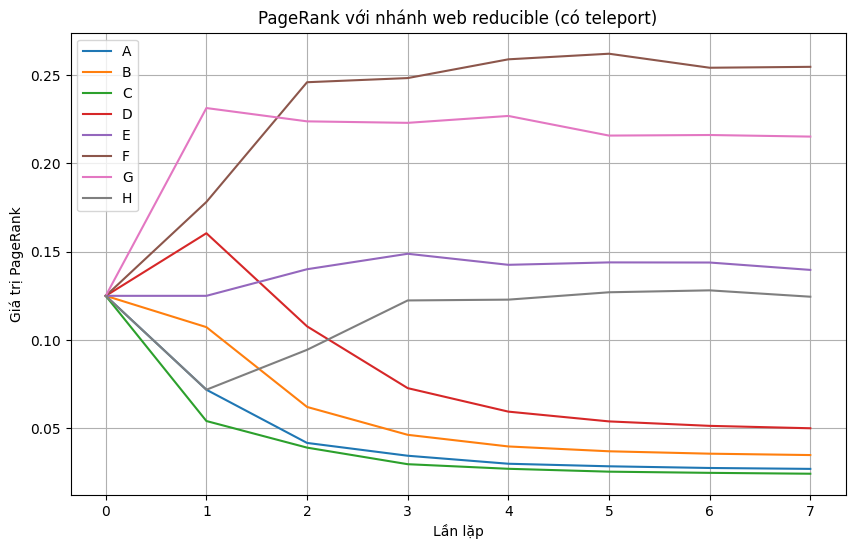

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

d = 0.85
N = 8

A = np.array([
    [0.0,   0.0,   1/2,   0.0,   0.0,   0.0,   0.0,   0.0],
    [1/3,   0.0,   1/2,   0.0,   0.0,   0.0,   0.0,   0.0],
    [1/3,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0],
    [1/3, 1/2,   1/2,   0.0,   0.0,   0.0,   0.0,   0.0],
    [0.0, 1/2,   0.0,   0.0,   0.0, 1/2,   0.0,   0.0],
    [0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   1.0, 1/2],
    [0.0,   0.0,   0.0, 1/2,   1.0,   0.0,   0.0, 1/2],
    [0.0,   0.0,   0.0,   0.0,   0.0, 1/2,   0.0,   0.0]
])

x = np.array([1.0 / N] * N)
M = d * A + ((1 - d) / N) * np.ones((N, N))

iterations = [x.copy()]
for i in range(7):
    x = np.dot(M, x)
    iterations.append(x.copy())

df = pd.DataFrame(np.round(iterations, 6), columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
df.index.name = 'Lần lặp'
print(df)

plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title('PageRank với nhánh web reducible (có teleport)')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị PageRank')
plt.grid(True)
plt.legend()
plt.show()


Bài Tập Chương 7

Bài 1

Saving anh-bien-4.jpg to anh-bien-4 (2).jpg


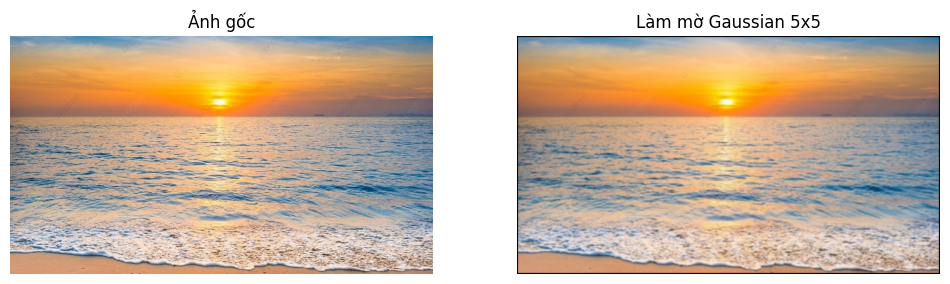

In [14]:
from google.colab import files
uploaded = files.upload()

from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
img = Image.open(filename)
img = img.convert("RGB")
input_pixels = img.load()
width, height = img.size

gauss_kernel = [
    [1/273, 4/273, 7/273, 4/273, 1/273],
    [4/273, 16/273, 26/273, 16/273, 4/273],
    [7/273, 26/273, 41/273, 26/273, 7/273],
    [4/273, 16/273, 26/273, 16/273, 4/273],
    [1/273, 4/273, 7/273, 4/273, 1/273]
]

offset = len(gauss_kernel) // 2
output_image = Image.new("RGB", (width, height))
draw = ImageDraw.Draw(output_image)

for x in range(offset, width - offset):
    for y in range(offset, height - offset):
        acc = [0, 0, 0]
        for a in range(len(gauss_kernel)):
            for b in range(len(gauss_kernel[0])):
                xn = x + a - offset
                yn = y + b - offset
                r, g, b_val = input_pixels[xn, yn]
                weight = gauss_kernel[a][b]
                acc[0] += r * weight
                acc[1] += g * weight
                acc[2] += b_val * weight
        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

output_image.save('output_gauss5x5.jpg')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Ảnh gốc")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Làm mờ Gaussian 5x5")
plt.imshow(output_image)
plt.axis('off')
plt.show()


Bài 2

Saving tải xuống (1).jpg to tải xuống (1).jpg


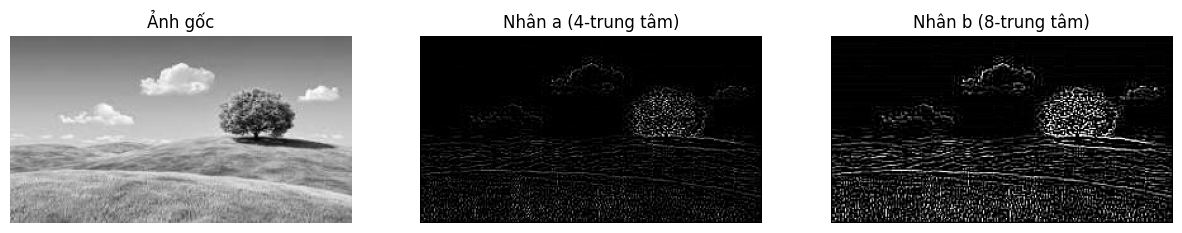

In [15]:
from google.colab import files
uploaded = files.upload()

from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
img = Image.open(filename)
img = img.convert("L")
input_pixels = img.load()
width, height = img.size

kernel1 = [
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
]

kernel2 = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]

def apply_kernel(kernel):
    offset = len(kernel) // 2
    output = Image.new("L", (width, height))
    draw = ImageDraw.Draw(output)
    for x in range(offset, width - offset):
        for y in range(offset, height - offset):
            acc = 0
            for a in range(len(kernel)):
                for b in range(len(kernel[0])):
                    xn = x + a - offset
                    yn = y + b - offset
                    pixel = input_pixels[xn, yn]
                    acc += pixel * kernel[a][b]
            acc = max(0, min(255, int(acc)))
            draw.point((x, y), acc)
    return output

output1 = apply_kernel(kernel1)
output2 = apply_kernel(kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Ảnh gốc")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Nhân a (4-trung tâm)")
plt.imshow(output1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Nhân b (8-trung tâm)")
plt.imshow(output2, cmap='gray')
plt.axis('off')
plt.show()
